In [1]:
import csv
from tqdm import tqdm
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# 1. Rotten Tomatoes에서 크롤링한 연도별 오스카 작품상 후보작 리뷰 데이터 취합 (2017~2021년)

In [3]:
data_2017 = []
f = open('rotten_tomato_critics_review_2017.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    data_2017.append(''.join(line))
f.close() 

In [4]:
data_2018 = []
f = open('rotten_tomato_critics_review_2018.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    data_2018.append(''.join(line))
f.close() 

In [5]:
data_2019 = []
f = open('rotten_tomato_critics_review_2019.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    data_2019.append(''.join(line))
f.close() 

In [6]:
data_2020 = []
f = open('rotten_tomato_critics_review_2020.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    data_2020.append(''.join(line))
f.close() 

In [7]:
data_2021 = []
f = open('rotten_tomato_critics_review_2021.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    data_2021.append(''.join(line))
f.close() 

# 2. 데이터 전처리

In [18]:
import nltk
from nltk.stem import WordNetLemmatizer

## 불용어(영화 제목들도 의미를 가지고 있는 단어라서 분석에 방해가 될 가능성이 높아 불용어처리함)
stop = ['land', 'hacksaw', 'ridge', 'moonlight','phantom', 'thread', 'darkest', 'dunkirk', 'favourite', 'vice', '1917', 'parasite', 'joker', 'irishman', 'marriage', 'nomaland', 'minari', 'messiah', 'could', "n't",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# 데이터전처리
def preprocessing(text):
    tokens = [word for sent in nltk.sent_tokenize(text)
              for word in nltk.word_tokenize(sent)]
  
    # 소문자로 통일
    tokens = [word.lower() for word in tokens]
    
    # 3글자 미만 단어 제거
    tokens = [word for word in tokens if len(word) >= 3]
    
    # 불용어 제거
    tokens = [token for token in tokens if token not in stop]
    
    # lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]
    
    preprocessed_text= ' '.join(tokens)
    
    return preprocessed_text

In [19]:
preprocessed_data_2017 = []
for line in data_2017[1:]:
    preprocessed_data_2017.append(preprocessing(line))
preprocessed_data_2017[0:10]

['simple tale tell visual inventiveness remind audience power inherent cinema',
 'chazelle choose lead well know bet team much sizzle middle crazy stupid love would fall flat bring together',
 'gorgeous spectacle fill beautiful music light color must-see movie year',
 'breathe new life old genre perform cpr bring beat heart back vibrant life',
 'lovely please showstopping movie watch biggest screen loudest sound brightest color possible',
 'celebration music magic swell emotion capture somber yet jazzy leitmotif',
 'feature career best performance emma stone',
 'biggest fail complacency ...',
 'clash style idea collectively embrace balance cheese meet whimsical romance meet heartbreak old tradition meet modern way sincere heart meet good fun completely own magical way',
 'bask wonder excitement young love optimism dreamer nostalgia classic hollywood emotion musical fantasy']

In [20]:
preprocessed_data_2018 = []
for line in data_2018[1:]:
    preprocessed_data_2018.append(preprocessing(line))

In [21]:
preprocessed_data_2019 = []
for line in data_2019[1:]:
    preprocessed_data_2019.append(preprocessing(line))

In [22]:
preprocessed_data_2020 = []
for line in data_2020[1:]:
    preprocessed_data_2020.append(preprocessing(line))

In [13]:
preprocessed_data_2021 = []
for line in data_2021[1:]:
    preprocessed_data_2021.append(preprocessing(line))

# 3. Logistic Regression 긍정/부정 리뷰 판독 모델 생성

In [23]:
## 각종 rotten tomatoes 비평가 영화리뷰 데이터
dataset = []
f = open('rotten_tomatoes_critic_reviews_dataset.csv', 'r', encoding='latin_1')
rdr = csv.reader(f)
for line in tqdm(rdr):
    if line not in dataset:
        dataset.append(line)
f.close()

371900it [40:59, 151.20it/s]


In [29]:
len(dataset)

328959

In [ ]:
dataset = dataset[1:]

In [31]:
review_data = []

for i in dataset:
        review_data.append(i[0:2])

In [33]:
dataset_df = pd.DataFrame(review_data, columns = ['review', 'label'])
dataset_df

,review,label
0,Zwick wants to tell timeless stories on a gran...,1
1,"Zvyagintsev has always been wildly ambitious, ...",1
2,Zorro follows the predictable paths of action ...,1
3,Zora Howard is a breakout talent and she endow...,1
4,Zora Howard gives a performance that will make...,1
...,...,...
328953,I don't just hand out zeroes becuase I'm havin...,0
328954,Director Shawn Levy found success with Night a...,0
328955,A tasteless waste of celluloid of no redeeming...,0
328956,"A ""what happened next"" DVD extra that got stre...",0


In [34]:
#review, rating 분류
filtered_texts = []
filtered_labels = []
for line in tqdm(dataset_df['review']):
    filtered_texts.append(preprocessing(line))
for label in tqdm(dataset_df['label']):
    filtered_labels.append(int(label))

100%|█████████████████████████████████████████████████████████████████████| 328958/328958 [00:00<00:00, 1853125.10it/s]


In [37]:
#train, test 데이터 분리
train_texts, test_texts, train_labels, test_labels = train_test_split(filtered_texts, filtered_labels, test_size=0.2, random_state=0)

In [41]:
#TF-IDF 벡터화
tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 
tf_train_features = tf_vectorizer.fit_transform(train_texts) 
tf_test_features = tf_vectorizer.transform(test_texts)

In [42]:
vocablist = [word for word, _ in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [185]:
vocablist[:10]

['00', '000', '000bc', '000th', '007', '00s', '01', '02', '03', '04']

In [45]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1)) 
tfidf_train_features = tfidf_vectorizer.fit_transform(train_texts) 
tfidf_test_features = tfidf_vectorizer.transform(test_texts)

In [223]:
#grid search
lg = LogisticRegression(solver = 'saga')
param_grid = { 'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10] }
grid_search = GridSearchCV(estimator = lg, param_grid = param_grid, cv=5, n_jobs = -1)  
grid_search.fit(tfidf_train_features, train_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
                         'penalty': ['l1', 'l2']})

In [224]:
grid_search.best_params_

{'C': 2, 'penalty': 'l2'}

In [46]:
# tfidf matrix를 사용한 경우
lr1_tfidf = LogisticRegression(C=2, penalty='l2', solver='saga') # Lasso regression
lr1_tfidf.fit(tfidf_train_features, train_labels) # 학습
pred_labels = lr1_tfidf.predict(tfidf_test_features)

In [228]:
print('Misclassified samples: {} out of {}'.format((pred_labels != test_labels).sum(),len(test_labels)))
print('Accuracy: %.2f' % accuracy_score(test_labels, pred_labels))

Misclassified samples: 9727 out of 65792
Accuracy: 0.85


In [229]:
confusion_matrix(test_labels, pred_labels)

array([[17187,  5883],
       [ 3844, 38878]], dtype=int64)

In [230]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     23070
           1       0.87      0.91      0.89     42722

    accuracy                           0.85     65792
   macro avg       0.84      0.83      0.83     65792
weighted avg       0.85      0.85      0.85     65792



In [231]:
labels_prob = lr1_tfidf.predict_proba(tfidf_test_features)

In [232]:
pred_labels

array([0, 1, 0, ..., 1, 0, 1])

In [233]:
labels_prob

array([[0.98903389, 0.01096611],
       [0.04801792, 0.95198208],
       [0.98005288, 0.01994712],
       ...,
       [0.03652601, 0.96347399],
       [0.91269738, 0.08730262],
       [0.40410621, 0.59589379]])

In [234]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(test_labels, labels_prob[:,1], pos_label=1)

# roc curve for tpr2 = fpr2
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

In [235]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(test_labels, labels_prob[:,1])

print(auc_score)

0.9217538015098957


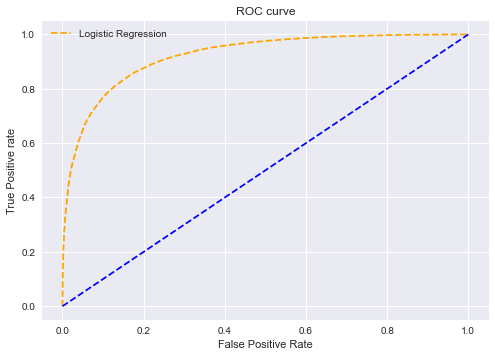

In [236]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [49]:
# coefficients 
coefficients = lr1_tfidf.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재
# coefficient값이 큰 순으로 정렬 'reverse=True'

print(sorted_coefficients[:5])
# 상위 20개 긍정 단어
for word, coef in sorted_coefficients[:20]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

print()
# 상위 20개 부정 단어
for word, coef in reversed(sorted_coefficients[-20:]):
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

[(44789, 6.683994708023007), (7636, 6.539059282514288), (56174, 6.527186167327428), (14679, 6.454218607836324), (7635, 6.352174637600115)]
powerful (6.684)
brilliantly (6.539)
superb (6.527)
delightful (6.454)
brilliant (6.352)
absorb (6.241)
mesmerize (6.160)
beautifully (6.112)
rivet (6.030)
masterpiece (5.979)
masterful (5.829)
wonderful (5.790)
engross (5.736)
refresh (5.725)
exhilarate (5.678)
superbly (5.672)
gem (5.668)
delightfully (5.623)
unforgettable (5.602)
terrific (5.587)

worst (-8.504)
unfunny (-8.280)
unfortunately (-8.252)
fail (-7.868)
tedious (-7.768)
dull (-7.437)
bland (-7.130)
poorly (-7.050)
plod (-6.984)
lifeless (-6.722)
inept (-6.708)
misfire (-6.665)
bore (-6.661)
awful (-6.529)
uninspired (-6.491)
sadly (-6.415)
waste (-6.377)
squander (-6.131)
lack (-6.106)
unconvincing (-6.009)


# 4. 연도별 영화 리뷰 긍정/부정 비율 결과

### 4-1) 2017

In [237]:
tfidf_test_features_17 = tfidf_vectorizer.transform(preprocessed_data_2017)
pred_labels_17 = lr1_tfidf.predict(tfidf_test_features_17)

In [238]:
len(pred_labels_17.tolist())

2960

In [239]:
## 긍정 비율
pos_rate_17 = {
    'LA LA Land 긍정 비율 ': (pred_labels_17.tolist()[:460].count(1)/len(pred_labels_17.tolist()[:460])),
    'Hell or High Water 긍정 비율' :(pred_labels_17.tolist()[460:741].count(1)/len(pred_labels_17.tolist()[460:741])),
    'Hacksaw Ridge 긍정 비율' :  (pred_labels_17.tolist()[741:1000].count(1)/len(pred_labels_17.tolist()[741:1000])),
    'Arrival 긍정 비율' :  (pred_labels_17.tolist()[1000:1420].count(1)/len(pred_labels_17.tolist()[1000:1420])),
    'Hidden Figures 긍정 비율' : (pred_labels_17.tolist()[1420:1720].count(1)/len(pred_labels_17.tolist()[1420:1720])),
    'Manchester by the Sea 긍정 비율' : (pred_labels_17.tolist()[1720:2060].count(1)/len(pred_labels_17.tolist()[1720:2060])),
    'Lion 긍정 비율' : (pred_labels_17.tolist()[2060:2320].count(1)/len(pred_labels_17.tolist()[2060:2320])),
    'Moonlight 긍정 비율' : (pred_labels_17.tolist()[2320:2700].count(1)/len(pred_labels_17.tolist()[2320:2700])),
    'Fences 긍정 비율' : (pred_labels_17.tolist()[2700:].count(1)/len(pred_labels_17.tolist()[2700:]))
}

In [240]:
sort_pos_rate_17 = sorted(pos_rate_17.items(), key = lambda x : x[1], reverse = True)

for i in sort_pos_rate_17:
    print(i[0], i[1])

Moonlight 긍정 비율 0.9710526315789474
Hell or High Water 긍정 비율 0.9501779359430605
LA LA Land 긍정 비율  0.9304347826086956
Manchester by the Sea 긍정 비율 0.9294117647058824
Arrival 긍정 비율 0.919047619047619
Fences 긍정 비율 0.9153846153846154
Hidden Figures 긍정 비율 0.9066666666666666
Hacksaw Ridge 긍정 비율 0.8764478764478765
Lion 긍정 비율 0.8461538461538461


2017년 작품상 수상작: Moonlight\
실제 수상작과 모델 예측 1위 일치

### 4-2) 2018

In [241]:
tfidf_test_features_18 = tfidf_vectorizer.transform(preprocessed_data_2018)
pred_labels_18 = lr1_tfidf.predict(tfidf_test_features_18)

In [242]:
len(pred_labels_18.tolist())

3440

In [243]:
## 긍정 비율
pos_rate_18 = {
    'The Shape Of Water 긍정' : (pred_labels_18.tolist()[:440].count(1)/len(pred_labels_18.tolist()[:440])),
    'Phantom Thread 긍정 비율' : (pred_labels_18.tolist()[440:780].count(1)/len(pred_labels_18.tolist()[440:780])),
    'The Post 긍정 비율' : (pred_labels_18.tolist()[780:1180].count(1)/len(pred_labels_18.tolist()[780:1180])),
    'Darkest Hour 긍정 비율' : (pred_labels_18.tolist()[1180:1480].count(1)/len(pred_labels_18.tolist()[1180:1480])),
    'Three Billboards Outside Ebbing, Missouri 긍정 비율' : (pred_labels_18.tolist()[1480:1880].count(1)/len(pred_labels_18.tolist()[1480:1880])),
    'Call Me By Your Name 긍정 비율' : (pred_labels_18.tolist()[1880:2220].count(1)/len(pred_labels_18.tolist()[1880:2220])),
    'Dunkirk 긍정 비율' : (pred_labels_18.tolist()[2220:2680].count(1)/len(pred_labels_18.tolist()[2220:2680])),
    'Get Out 긍정 비율 긍정 비율': (pred_labels_18.tolist()[2680:3060].count(1)/len(pred_labels_18.tolist()[2680:3060])),
    'Lady Bird 긍정 비율': (pred_labels_18.tolist()[3060:].count(1)/len(pred_labels_18.tolist()[3060:]))
}

In [244]:
sort_pos_rate_18 = sorted(pos_rate_18.items(), key = lambda x : x[1], reverse = True)

for i in sort_pos_rate_18:
    print(i[0], i[1])

Phantom Thread 긍정 비율 0.9470588235294117
The Post 긍정 비율 0.94
Lady Bird 긍정 비율 0.9394736842105263
The Shape Of Water 긍정 0.9386363636363636
Call Me By Your Name 긍정 비율 0.9323529411764706
Get Out 긍정 비율 긍정 비율 0.9315789473684211
Three Billboards Outside Ebbing, Missouri 긍정 비율 0.9225
Dunkirk 긍정 비율 0.9065217391304348
Darkest Hour 긍정 비율 0.8866666666666667


2018년 작품상 수상작: The Shape Of Water\
실제 수상작과 모델 예측 1위 불일치

### 4-3) 2019

In [245]:
tfidf_test_features_19 = tfidf_vectorizer.transform(preprocessed_data_2019)
pred_labels_19 = lr1_tfidf.predict(tfidf_test_features_19)

In [246]:
len(pred_labels_19.tolist())

3360

In [247]:
## 긍정 비율
pos_rate_19 = {
    'Bohemian Rhapsody 긍정 비율' : (pred_labels_19.tolist()[:340].count(1)/len(pred_labels_19.tolist()[:340])),
    'BlacKkKlansman 긍정 비율' : (pred_labels_19.tolist()[340:740].count(1)/len(pred_labels_19.tolist()[340:740])),
    'A Star is Born 긍정 비율' : (pred_labels_19.tolist()[740:1140].count(1)/len(pred_labels_19.tolist()[740:1140])),
    'The Favourite 긍정 비율' : (pred_labels_19.tolist()[1140:1660].count(1)/len(pred_labels_19.tolist()[1140:1660])),
    'Green Book 긍정 비율' : (pred_labels_19.tolist()[1660:2100].count(1)/len(pred_labels_19.tolist()[1660:2100])),
    'Roma 긍정 비율' : (pred_labels_19.tolist()[2100:2460].count(1)/len(pred_labels_19.tolist()[2100:2460])),
    'Black Panther 긍정 비율' : (pred_labels_19.tolist()[2460:2980].count(1)/len(pred_labels_19.tolist()[2460:2980])),
    'vice 긍정 비율' : (pred_labels_19.tolist()[2980:].count(1)/len(pred_labels_19.tolist()[2980:]))
    }

In [248]:
sort_pos_rate_19 = sorted(pos_rate_19.items(), key = lambda x : x[1], reverse = True)

for i in sort_pos_rate_19:
    print(i[0], i[1])

vice 긍정 비율 0.9631578947368421
The Favourite 긍정 비율 0.9365384615384615
Green Book 긍정 비율 0.9181818181818182
A Star is Born 긍정 비율 0.91
Black Panther 긍정 비율 0.8807692307692307
Bohemian Rhapsody 긍정 비율 0.8176470588235294
Roma 긍정 비율 0.7388888888888889
BlacKkKlansman 긍정 비율 0.715


2019년 작품상 수상작: Green Book\
실제 수상작과 모델 예측 1위 불일치

### 4-4) 2020

In [249]:
tfidf_test_features_20 = tfidf_vectorizer.transform(preprocessed_data_2020)
pred_labels_20 = lr1_tfidf.predict(tfidf_test_features_20)

In [250]:
len(pred_labels_20.tolist())

4000

In [251]:
## 긍정 비율
pos_rate_20 = {
    '1917 긍정 비율' : (pred_labels_20.tolist()[:440].count(1)/len(pred_labels_20.tolist()[:440])),
    'Joker 긍정 비율' : (pred_labels_20.tolist()[440:1020].count(1)/len(pred_labels_20.tolist()[440:1020])),
    'The Irishman 긍정 비율' : (pred_labels_20.tolist()[1020:1460].count(1)/len(pred_labels_20.tolist()[1020:1460])),
    'Little Women 긍정 비율' : (pred_labels_20.tolist()[1460:1860].count(1)/len(pred_labels_20.tolist()[1460:1860])),
    'Jojo rabbit 긍정 비율' : (pred_labels_20.tolist()[1860:2280].count(1)/len(pred_labels_20.tolist()[1860:2280])),
    'Marriage Story 긍정 비율' : (pred_labels_20.tolist()[2280:2660].count(1)/len(pred_labels_20.tolist()[2280:2660])),
    'Parasite 긍정 비율' : (pred_labels_20.tolist()[2660:3100].count(1)/len(pred_labels_20.tolist()[2660:3100])),
    'Once Upon A Time …In Hollywood 긍정 비율' : (pred_labels_20.tolist()[3100:3660].count(1)/len(pred_labels_20.tolist()[3100:3660])),
    'Ford v Ferrari 긍정 비율' : (pred_labels_20.tolist()[3660:].count(1)/len(pred_labels_20.tolist()[3660:]))
    }

In [252]:
sort_pos_rate_20 = sorted(pos_rate_20.items(), key = lambda x : x[1], reverse = True)

for i in sort_pos_rate_20:
    print(i[0], i[1])

Parasite 긍정 비율 0.9613636363636363
The Irishman 긍정 비율 0.9340909090909091
Little Women 긍정 비율 0.93
Marriage Story 긍정 비율 0.9289473684210526
Ford v Ferrari 긍정 비율 0.9205882352941176
Once Upon A Time …In Hollywood 긍정 비율 0.9
1917 긍정 비율 0.8931818181818182
Jojo rabbit 긍정 비율 0.8642857142857143
Joker 긍정 비율 0.7603448275862069


2020년 작품상 수상작: Parasite\
실제 수상작과 모델 예측 1위 일치

### 4-5) 2021

In [253]:
tfidf_test_features_21 = tfidf_vectorizer.transform(preprocessed_data_2021)
pred_labels_21 = lr1_tfidf.predict(tfidf_test_features_21)

In [254]:
len(pred_labels_21.tolist())

2500

In [255]:
## 긍정 비율
pos_rate_21 = {
    'Nomadland 긍정 비율' : (pred_labels_21.tolist()[:400].count(1)/len(pred_labels_21.tolist()[:400])),
    'The Father 긍정 비율' : (pred_labels_21.tolist()[400:620].count(1)/len(pred_labels_21.tolist()[400:620])),
    'Minari 긍정 비율' : (pred_labels_21.tolist()[620:900].count(1)/len(pred_labels_21.tolist()[620:900])),
    'Mank 긍정 비율' : (pred_labels_21.tolist()[900:1220].count(1)/len(pred_labels_21.tolist()[900:1220])),
    'Sound of Metal긍정 비율' : (pred_labels_21.tolist()[1220:1480].count(1)/len(pred_labels_21.tolist()[1220:1480])),
    'Promising Young Woman긍정 비율' : (pred_labels_21.tolist()[1480:1860].count(1)/len(pred_labels_21.tolist()[1480:1860])),
    'Judas and the Black Messiah 긍정 비율' : (pred_labels_21.tolist()[1860:2180].count(1)/len(pred_labels_21.tolist()[1860:2180])),
    'The Trial of the Chicago 7 긍정 비율' :(pred_labels_21.tolist()[2180:].count(1)/len(pred_labels_21.tolist()[2180:])),
    }

In [256]:
sort_pos_rate_21 = sorted(pos_rate_21.items(), key = lambda x : x[1], reverse = True)

for i in sort_pos_rate_21:
    print(i[0], i[1])

The Trial of the Chicago 7 긍정 비율 0.95
Judas and the Black Messiah 긍정 비율 0.946875
Minari 긍정 비율 0.9464285714285714
Sound of Metal긍정 비율 0.9461538461538461
The Father 긍정 비율 0.9363636363636364
Nomadland 긍정 비율 0.9025
Mank 긍정 비율 0.871875
Promising Young Woman긍정 비율 0.8447368421052631


2021년 작품상 수상작: Nomaland\
실제 수상작과 모델 예측 1위 불일치